![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

# 1.0 - Ways to Read CSV Files

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

There are various ways to read CSV files into Python. Some are more traditional while some uses ready to go library functions, like in `pandas.read_csv()`. Here we are going to brief over one way to read CSV files traditionally and one way to read it using `pandas` library function.

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 1.1 - Reading in a Traditional Way

We can read the files in a much more traditional way, but the consequences is that the DataFrame of the data made out of it will going to be strings, unless we provide parsing datatypes in our CSV reading method

In [3]:

# We are going to import the required libraries first!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# The read CSV function, will return an array containing arrays of row data

from typing import *
import requests


def my_read_csv( url: str, delimiter:str = ',' ) -> List:
    # If the delimiter provided is not of length 1, return Error
    if ( len(delimiter) != 1 ):
        raise ValueError('The delimiter must be string of length 1 (Provided: {})'.format(delimiter) )

    # Try to make request for the file. If it fails, (Either not 200 or unable to fetch) return an Error
    try:
        response: requests.Response = requests.request('GET', url )
        if response.status_code != 200:
            raise ConnectionError()
    except:
        raise ConnectionError('Unable to fetch the file at the provided url: {}'.format(url ) )

    # Split the text file by each row
    rows = response.text.split('\r\n')
    # Split each row by its delimiter
    table = [ row.split(delimiter) for row in rows ]

    return table


In [5]:

# Here is a simple test for the above function
my_read_csv('https://raw.githubusercontent.com/AdmiJW/Items/master/fcc-forum-pageviews.csv')


[['date', 'value'],
 ['2016-05-09', '1201'],
 ['2016-05-10', '2329'],
 ['2016-05-11', '1716'],
 ['2016-05-12', '10539'],
 ['2016-05-13', '6933'],
 ['2016-05-14', '3127'],
 ['2016-05-15', '2927'],
 ['2016-05-16', '2591'],
 ['2016-05-17', '3403'],
 ['2016-05-18', '5410'],
 ['2016-05-19', '19736'],
 ['2016-05-20', '17491'],
 ['2016-05-21', '13370'],
 ['2016-05-22', '13158'],
 ['2016-05-23', '13887'],
 ['2016-05-24', '15336'],
 ['2016-05-25', '14779'],
 ['2016-05-26', '18060'],
 ['2016-05-27', '19997'],
 ['2016-05-28', '19044'],
 ['2016-05-29', '20325'],
 ['2016-05-30', '16607'],
 ['2016-05-31', '16616'],
 ['2016-06-01', '13007'],
 ['2016-06-02', '10329'],
 ['2016-06-03', '10155'],
 ['2016-06-04', '7431'],
 ['2016-06-05', '16031'],
 ['2016-06-06', '16621'],
 ['2016-06-07', '18335'],
 ['2016-06-08', '18072'],
 ['2016-06-09', '18139'],
 ['2016-06-10', '17087'],
 ['2016-06-11', '16098'],
 ['2016-06-12', '16147'],
 ['2016-06-13', '17570'],
 ['2016-06-14', '19395'],
 ['2016-06-15', '18584'],
 [

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_red.png?raw=true)

### 1.2 Reading CSV in Pandas Way

Of course, `pandas` comes with a convenient function for us to read CSV files. It comes with a lot of parameters for us to determine its behavior of reading CSV files. With this, we don't need to create the DataFrame ourselves, the function will return a DataFrame based on that CSV.

In [6]:

#   Own made wrapper function for pandas read_csv() function, preserves some of its useful functionality only
#   url - The URL used to find the CSV file
#   delimiter - Optional, default to comma ','. The delimiter to be used for parsing CSV
#   header - Optional, default to False. Whether to parse the first row as column names or not.
#   parseDate - Optional, default to False. Whether to auto detect date columns and parse it into correct datatype
def pandas_read_csv( url:str, delimiter:str = ',', header:bool = False ):
    return pd.read_csv( url, sep=delimiter, header=(0 if header else None) )


In [7]:

#   A function to test the above function
pandas_read_csv('https://raw.githubusercontent.com/AdmiJW/Items/master/fcc-forum-pageviews.csv',
           delimiter=',', header=True)


,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

# 2.0 - Data Preparation

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

Now for real we have to prepare our data for analysis. The DataFrame has to be set up and be in the correct format for us to process.

* Fetching the data
* Setting the column name
* Setting the index
* Correcting Data Types for each Column
* Removing extra lines (if any)

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.1 - Fetching The Data

This time, we will be fetching the data using the traditional method - Using requests library and creating DataFrame ourselves.

In [8]:

# Obtain the parsed CSV in Python List
arrays = my_read_csv('https://raw.githubusercontent.com/AdmiJW/Items/master/fcc-forum-pageviews.csv')

# Create the DataFrame out of the List
df = pd.DataFrame( arrays )

# The DataFrame doesn't look so good is it?
df


,0,1
0,date,value
1,2016-05-09,1201
2,2016-05-10,2329
3,2016-05-11,1716
4,2016-05-12,10539
...,...,...
1301,2019-11-30,141161
1302,2019-12-01,142918
1303,2019-12-02,220144
1304,2019-12-03,158549


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.2 - Setting the Column Name

The first row of the DataFrame is actually the column names. Set the first row as the column name, and drop the first row after that

In [9]:

# Set the first row as column name
df.columns = df.iloc[0]

# Drop the first row, in place
df.drop( 0, axis=0, inplace=True )

# Looks better
df

,date,value
1,2016-05-09,1201
2,2016-05-10,2329
3,2016-05-11,1716
4,2016-05-12,10539
5,2016-05-13,6933
...,...,...
1301,2019-11-30,141161
1302,2019-12-01,142918
1303,2019-12-02,220144
1304,2019-12-03,158549


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.3 - Removing Empty Rows

From using `head()` and `tail()`, we can see there are empty rows in our CSV file! We have to drop that as well!

In [10]:

# Observing head
print( df.head() )
print()
print( df.tail() )   # There are 1 empty row in the df


df = df.iloc[0:-1]    # Overwrite the df so it only contains from first row until last row exclusively

df.tail()   # Successfully gotten rid of the last row

0        date  value
1  2016-05-09   1201
2  2016-05-10   2329
3  2016-05-11   1716
4  2016-05-12  10539
5  2016-05-13   6933

0           date   value
1301  2019-11-30  141161
1302  2019-12-01  142918
1303  2019-12-02  220144
1304  2019-12-03  158549
1305                None


,date,value
1300,2019-11-29,171584
1301,2019-11-30,141161
1302,2019-12-01,142918
1303,2019-12-02,220144
1304,2019-12-03,158549


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.4 - Setting the Index

We shall be setting the date as our index, since every row's date is different, and we shall be identifying the rows based on the date.

In [11]:

# Set the DataFrame's index as the date column
df.index = df.date

# Now we shall be deleting the date column, in place
df.drop( columns='date', axis=1, inplace=True )

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_blue.png?raw=true)

### 2.5 - Parsing the DataType of Columns

Now each column shall be in of type String. This is bad as Strings are hard to analyse, since it is not numeric data. We have to change them into respective datatypes

* The date (index) shall be converted into actual datetype datatype, using `pd.to_datetime()` function
* The value (page views) shall be set to some valid integer datatypes, depending on the upper and lower bound

In [12]:

##############################
#  Changing datatype of Date
##############################

df.index = pd.to_datetime( df.index )   # Using pd.to_datetime() to parse date in strings to datetime object

In [13]:

###############################
#  Changing datatype of value
###############################

# First we need to determine the maximum value and minimum value of the values
min_val = float('inf')
max_val = -float('inf')

for v in df.value:
    v = int(v)
    max_val = max( max_val, v )
    min_val = min( min_val, v )

print("Maximum: {} | Minimum: {}".format(max_val, min_val) )  # Max: 1173655 Min: 1201


# Since maximum goes up to 1173655, int32 is suitable for that

df.value = df.value.astype( np.int32 )

Maximum: 1173655 | Minimum: 1201


c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

# 3.0 - Data Cleaning

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_green.png?raw=true)

We have to filter out those data where the page view is below the 2.5th percentile or above the 97.5th percentile (Outliers).

In [14]:

# Obtain the value for 2.5th percentile
lowPercentile = np.percentile( df.value, 2.5 )

# Obtain the value for 97.5th percentile (0.975 quartile)
highPercentile = np.quantile( df.value, 0.975 )

# Obtain the mask for the NON-outliers
filterMask = ( df.value < highPercentile ) & (df.value > lowPercentile)

# Now we overwrite the DataFrame, without those included in the mask
df = df.loc[ filterMask ]

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

# 4.0 - Problem #1: Line Chart

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_orange.png?raw=true)

We have to draw a line chart, which shows the page view counts against the date, using `matplotlib.plot()`

In [15]:
def draw_line_plot():
    sns.set_style('darkgrid')
    fig = plt.figure( figsize=(16,8) )
    
    # Using font dict to set the font styles
    titleFontDict = {
        'fontsize': 25,
        'color': '#34495e',
    }
    
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019', titleFontDict)
    plt.xlabel('Date', fontsize=20, color='#7f8c8d')        # Instead of using fontdict we use keyword arguments to directly
    plt.ylabel('Page Views', fontsize=20, color='#7f8c8d')  # change the styling of the text
    
    # Plotting the graph
    plt.plot( df.index, df.value, 'r', linewidth=0.4 )
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

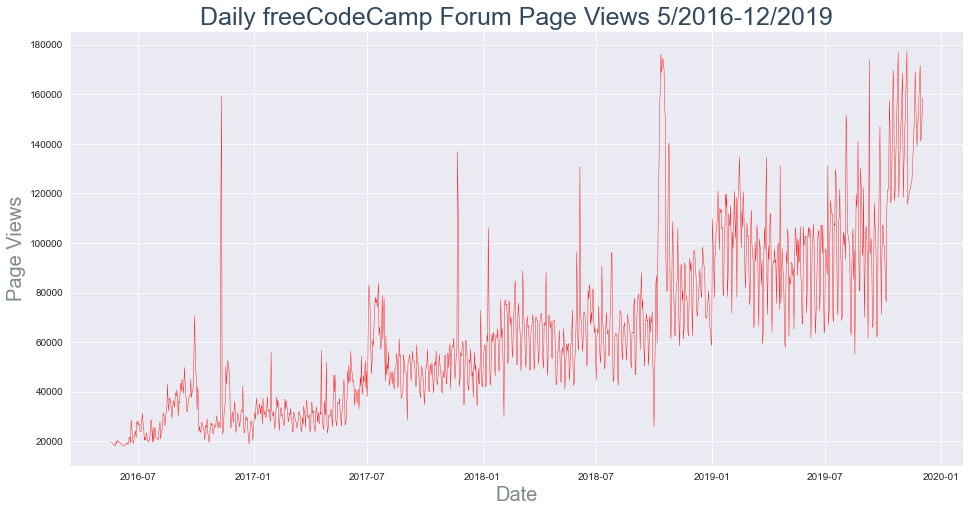

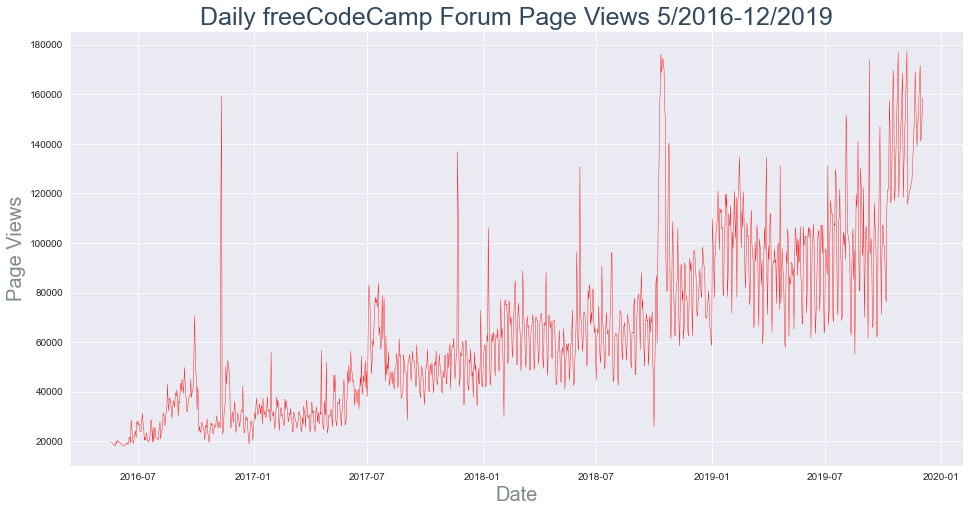

In [16]:
draw_line_plot()

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

# 5.0 - Problem #2: Drawing Bar Chart

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

Now what we have to do is to plot a bar chart. The bar chart will show the data for page views. Here are the details:

* x-axis: Years
* y-axis: Page views
* hue: Month of the year

As we can see, this is a more complex bar chart. The x axis are categorized by years, and within each year, it categorize further by color (hue) by month. This can be quite complicated to do using `matplotlib` alone, but the process can be simplified using `seaborn`, as it will do all that grouping for us.

No matter what, we have to extract the year and months from the `datetime` object from the index.

In [17]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy(deep=True)   # Deep copy, so any modification to datetime won't be reflected in actual df

    # Since by default all months will be returned from 1 to 12, we need a means to convert from the integer month to
    # their string form
    mapMonthToString = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                        'October', 'November', 'December']
    
    df_bar['month'] = df_bar.index.month.map( lambda x: mapMonthToString[x - 1] )
    df_bar['year'] = df_bar.index.year
    
    
    
    fig = plt.figure( figsize=(12,12) )
    
    bar_axes = sns.barplot( x='year', y='value', hue='month', data=df_bar, estimator=np.mean, palette='pastel',
                   ci=None, hue_order = mapMonthToString)
    
    bar_axes.set_xlabel('Years', fontsize='xx-large')
    bar_axes.set_ylabel('Average Page Views', fontsize='xx-large')
    bar_axes.legend( loc='upper left', title='Months', fontsize='large', title_fontsize='x-large')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

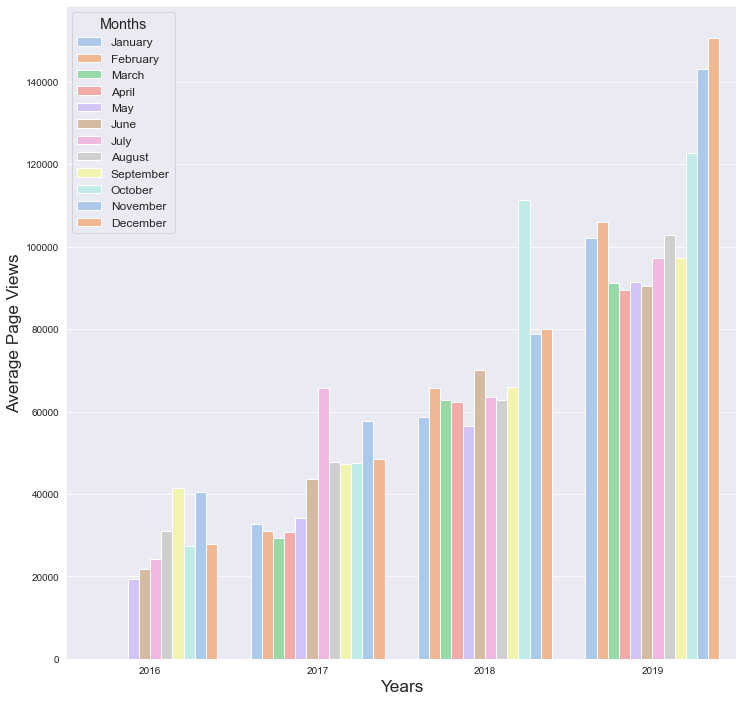

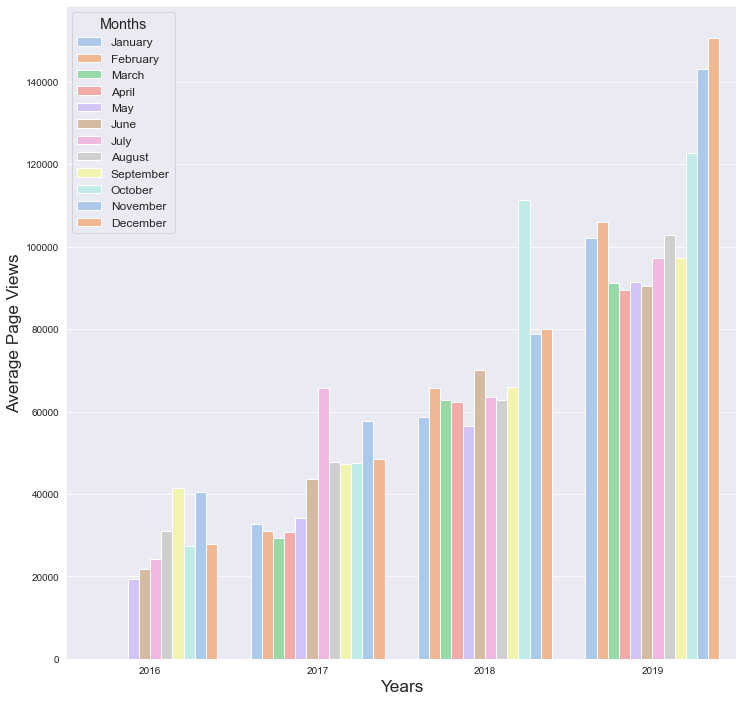

In [18]:
draw_bar_plot()

In [133]:

# A similar function to plot the bar chart, but this time use native matplotlib library instead of seaborn
def draw_bar_plot_matplotlib():
    df_bar = df.copy(deep=True)
    
    # Instead of mapping ourselves, use the library function: month_name()
    df_bar['month'] = df_bar.index.month_name()
    
    df_bar['year'] = df_bar.index.year
    
    monthsTuple = ('January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',\
                   'October','November', 'December')
    resultArr = list()
    
    
    # What we have to do is to create an array. This array
    #    > Size 12 representing each month.
    #    > Each element is another array size 4 represnting 4 years.
    for month in monthsTuple:
        thatMonth = df_bar.loc[ df_bar.month == month ]
        resultArr.append( list() )
        
        for year in df_bar.year.unique():
            resultArr[-1].append(  thatMonth.loc[ thatMonth.year == year ].value.mean() )
    
    
    barWidth = 0.05
    position = df_bar.year.unique()
    
    fig = plt.figure( figsize=(16,10) )
    
    
    # For the position, we have to count from -5,-4,-3.....4,5,6 so the x position is correctly offsetted.
    # The rest we can just pass in the respective values, and set the label as well!
    for i in range(12):
        plt.bar( position + barWidth * (i - 6), resultArr[i], width=barWidth, label=monthsTuple[i] )
    
    
    # Customize the axes label and legends
    axes = fig.get_axes()[0]
    
    axes.set_xlabel('Years', fontsize=20)
    axes.set_ylabel('Average Page Views', fontsize=20)
    axes.set_xticks( position )
    
    axes.legend(loc='upper left', title='Months', fontsize='large', title_fontsize='xx-large')
    
   
    
    
    

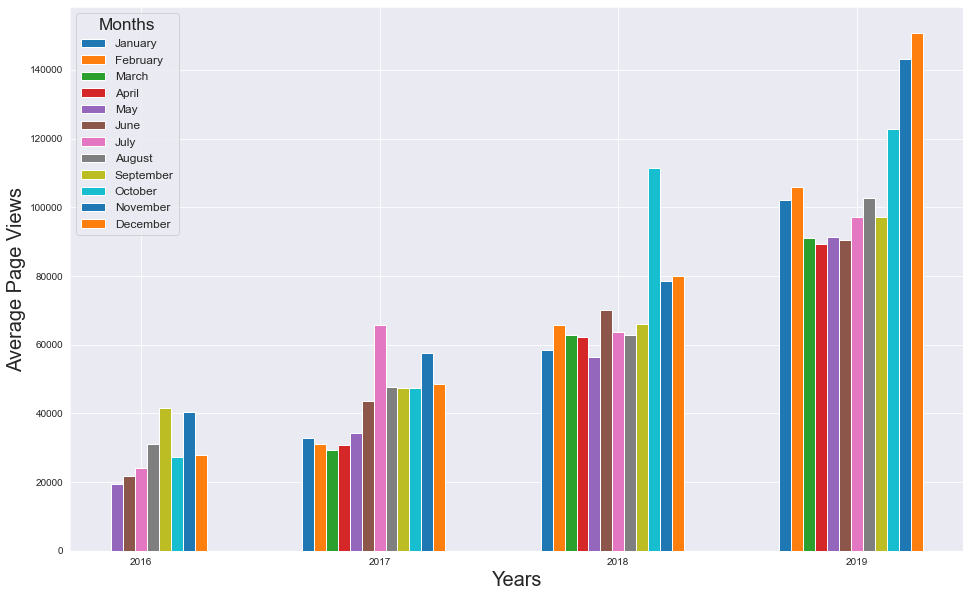

In [132]:
draw_bar_plot_matplotlib()

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

# 6.0 - Problem #3: Drawing Box Plot

![Bar](https://github.com/AdmiJW/Items/blob/master/SeperatingBars/Horizontalbar_purple.png?raw=true)

As for the box plot, we actually have to draw 2 box plots

* One where the x axis is categorized based on year
* One where the x axis is categorized based on month

Like above bar plot, we have to add 2 columns into the original DataFrame to make it easier to work with. We have to add the month column and year column.

In [23]:

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    
    fig = plt.figure( figsize=(16,8) )
    
    plt.subplot(1, 2, 1)
    plot1 = sns.boxplot( x = 'year', y = 'value', data=df_box )
    plot1.set_title('Year-wise Box Plot (Trend)')
    plot1.set_xlabel('Year')
    plot1.set_ylabel('Page Views')
    
    plt.subplot(1, 2, 2)
    plot2 = sns.boxplot( x = 'month', y = 'value', data=df_box,
                        order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plot2.set_title('Month-wise Box Plot (Seasonality)')
    plot2.set_xlabel('Month')
    plot2.set_ylabel('Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

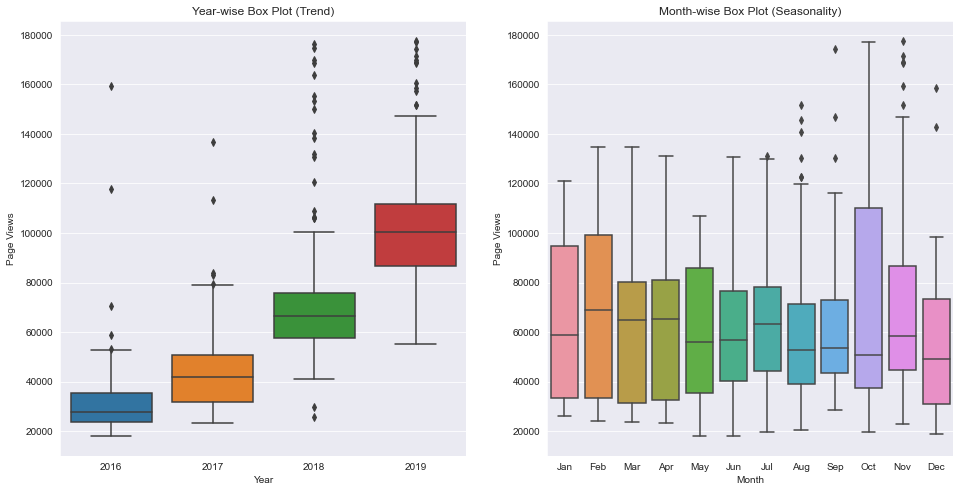

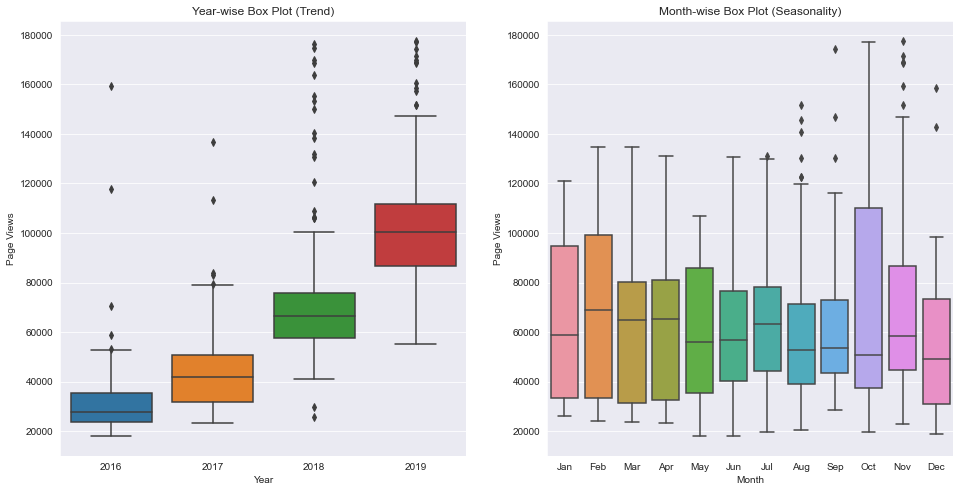

In [24]:
draw_box_plot()